In [51]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
from lammps_implicit_der.tools import plot_tools

In [123]:
delta = 0.05
num_cells = 13
#method = 'inverse'
#method = 'energy'

#path = '.'
path='/Users/imaliyov/run/potential-perturbation/HEA-one-shot/NERSC'

#filename = f'HEA_NiMo_{method}_{delta:.2f}_{num_cells:03d}.pkl'

filename_energy = f'HEA_NiMo_energy_{delta:.2f}_{num_cells:03d}.pkl'
filename_inverse = f'HEA_NiMo_inverse_{delta:.2f}_{num_cells:03d}.pkl'


with open(os.path.join(path, filename_inverse) , 'rb') as f:
    output_dict_inverse = pickle.load(f)

# Load the output_dict
if os.path.exists(os.path.join(path, filename_energy)):
    with open(os.path.join(path, filename_energy) , 'rb') as f:
        output_dict_energy = pickle.load(f)
else:
    output_dict_energy = output_dict_inverse

In [124]:

# Unpack the output_dict_energy
delta = output_dict_energy['delta']
dTheta = output_dict_energy['dTheta']
Theta_Ni = output_dict_energy['Theta_Ni']
Theta_Mo = output_dict_energy['Theta_Mo']
Theta_Mo_pert = output_dict_energy['Theta_Mo_pert']
dX_dTheta = output_dict_energy['dX_dTheta']
dX_pred = output_dict_energy['dX_pred']
dX_true = output_dict_energy['dX_true']
X_pred = output_dict_energy['X_pred']
X_true = output_dict_energy['X_true']
Natom = output_dict_energy['Natom']
dX_dTheta = output_dict_energy['dX_dTheta']
method = output_dict_energy['method']
species = output_dict_energy['species']
X0 = output_dict_energy['X0']

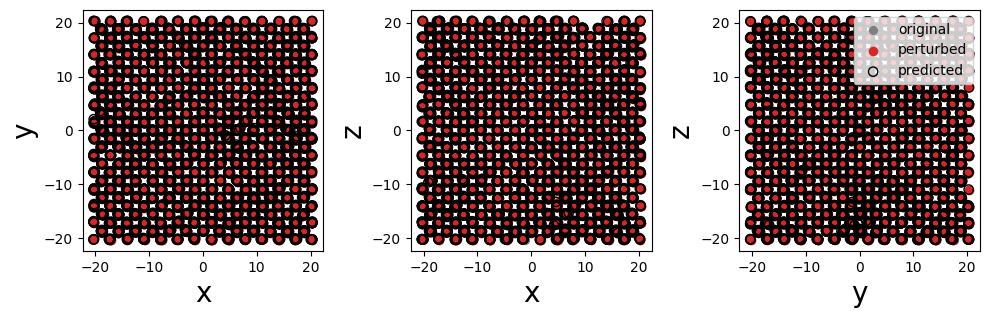

In [85]:
# Plot the coordinates
specie_color = {1: 'tab:orange', 2: 'tab:blue'}
specie_colors = [specie_color[s] for s in species]

color_list = ['black','tab:orange', 'tab:blue', 'black']
label_list = ['original', 'Ni', '$\delta$Mo', 'from dX/dTheta']

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

plot_tools.plot_coords(axes, X0.reshape(-1, 3), c='gray', s=32, label='original')
plot_tools.plot_coords(axes, X_true.reshape(-1, 3), c='tab:red', s=35, label='perturbed')
plot_tools.plot_coords(axes, X_pred.reshape(-1, 3), s=45, label='predicted', facecolors='none', edgecolors='black', marker='o')
plt.tight_layout()
plt.show()

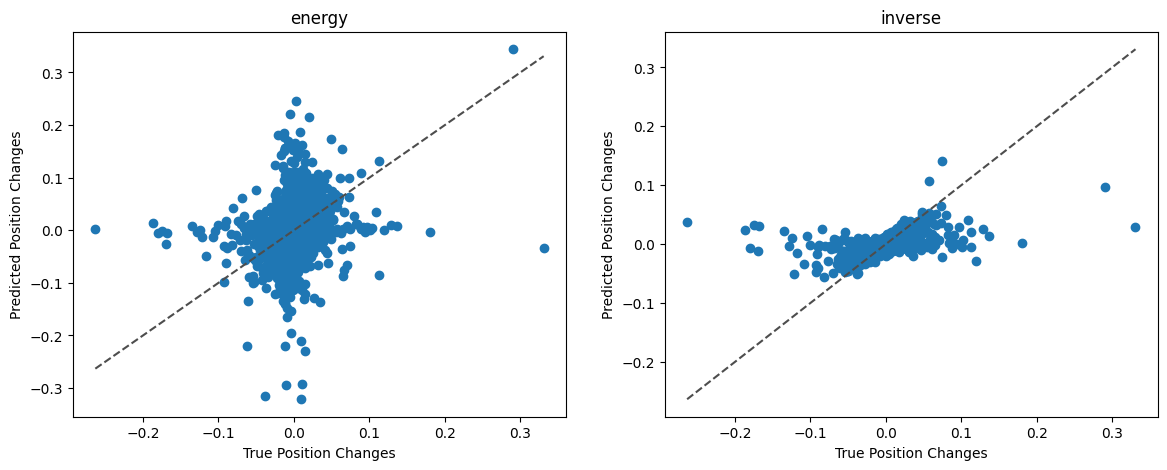

In [86]:
# Plot dX_true vs dX_pred

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# energy and inverse
for i, output_dict in enumerate([output_dict_energy, output_dict_inverse]):

    dX_true = output_dict['dX_true']
    dX_pred = output_dict['dX_pred']
    method = output_dict['method']
    ax[i].plot(dX_true, dX_pred, 'o')

    ax[i].set_xlabel('True Position Changes')
    ax[i].set_ylabel('Predicted Position Changes')

    # plot y=x line
    ax[i].plot( [dX_true.min(), dX_true.max()], [dX_true.min(), dX_true.max()], ls="--", c=".3")
    ax[i].set_title(f'{method}')

plt.show()

(13182,)
(13182,)


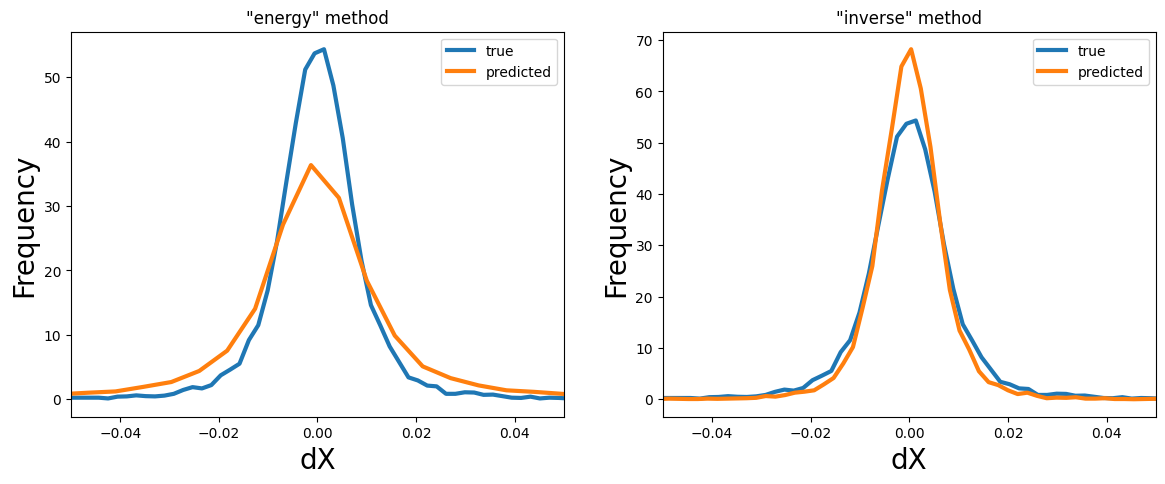

In [97]:
# plot histogram dX_pred vs dX_true

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i, output_dict in enumerate([output_dict_energy, output_dict_inverse]):

    dX_true = output_dict['dX_true']
    dX_pred = output_dict['dX_pred']
    method = output_dict['method']

    xmin, xmax = -0.1, 0.1
    dX_true_plot = dX_true[(dX_true > xmin) & (dX_true < xmax)]
    dX_pred_plot = dX_pred[(dX_true > xmin) & (dX_true < xmax)]

    #dX_true_plot = dX_true
    #dX_pred_plot = dX_pred

    #ax[i].hist(dX_true_plot, bins=100, color='tab:blue', alpha=0.5, label='true')
    #ax[i].hist(dX_pred_plot, bins=100, color='tab:orange', alpha=0.5, label='predicted')

    # Transform hists to curves
    hist, bin_edges = np.histogram(dX_true_plot, bins=100, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax[i].plot(bin_centers, hist, label='true', color='tab:blue', lw=3)

    hist, bin_edges = np.histogram(dX_pred_plot, bins=100, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax[i].plot(bin_centers, hist, label='predicted', color='tab:orange', lw=3)

    fsize=20
    ax[i].set_xlabel('dX', fontsize=fsize)
    ax[i].set_ylabel('Frequency', fontsize=fsize)
    ax[i].legend()
    ax[i].set_title(f'"{method}" method')

    ax[i].set_xlim(-0.05, 0.05)

print(dX_true.shape)
print(dX_pred.shape)

16 10
54 11
128 14
250 19
432 26
686 35
1024 48
1458 65
2000 85
2662 110
3456 141
4394 176
5488 218


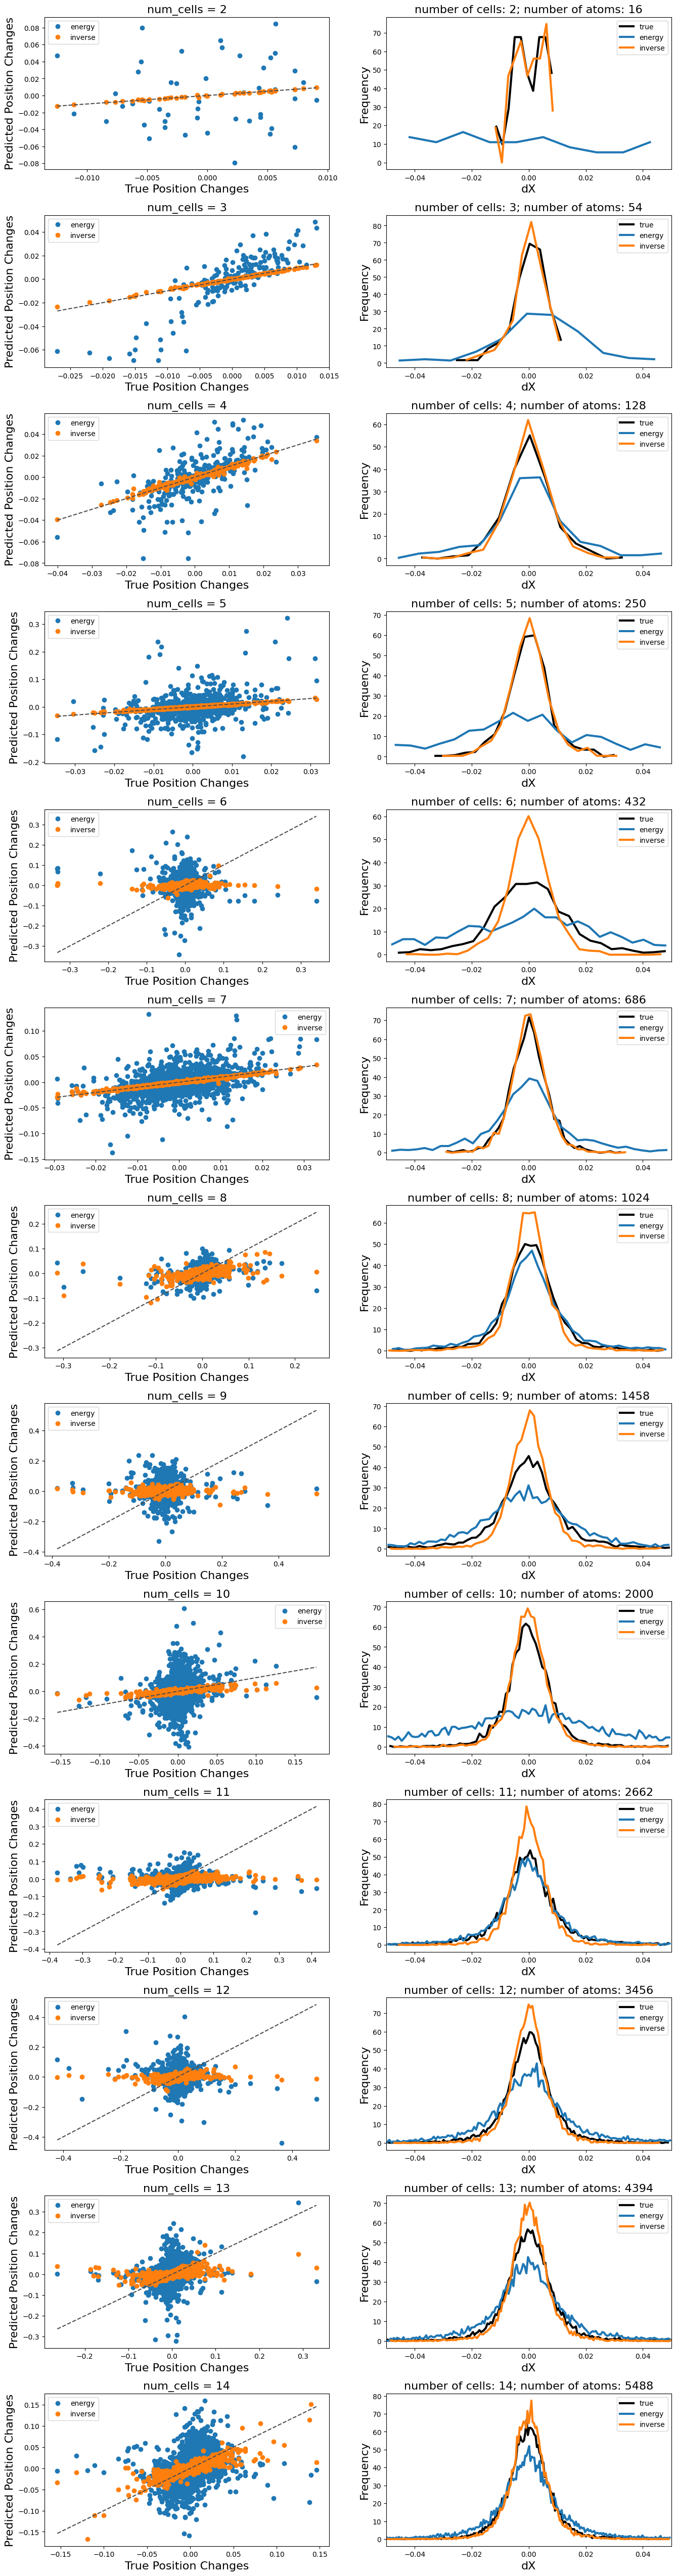

In [125]:
# Similarly plot side by side the histograms and dX_true vs dX_pred for num_cells from 2 to 13

num_cells_min = 2
num_cells_max = 14

fig, ax = plt.subplots(num_cells_max - num_cells_min + 1, 2, figsize=(16, 5 * (num_cells_max - num_cells_min + 1)))

plt.subplots_adjust(hspace=0.3)

for i, num_cells in enumerate(range(num_cells_min, num_cells_max + 1)):

    filename_energy = f'HEA_NiMo_energy_{delta:.2f}_{num_cells:03d}.pkl'
    filename_inverse = f'HEA_NiMo_inverse_{delta:.2f}_{num_cells:03d}.pkl'

    with open(os.path.join(path, filename_inverse) , 'rb') as f:
        output_dict_inverse = pickle.load(f)

    with open(os.path.join(path, filename_energy) , 'rb') as f:
        output_dict_energy = pickle.load(f)

    natom = output_dict_energy['Natom']

    # Unpack the output_dict_energy, only dX_true and dX_pred are needed
    dX_true = output_dict_energy['dX_true']
    dX_pred_energy = output_dict_energy['dX_pred']
    dX_pred_inverse = output_dict_inverse['dX_pred']

    # Change the number of bins linearly with the natom
    bin_min = 10
    bin_max = 200
    bins = int(bin_min + (bin_max - bin_min) * (natom - 5.0) / 5000.0)
    print(natom, bins)

    # Transform hists to curves
    xmin, xmax = -0.05, 0.05
    hist, bin_edges = np.histogram(dX_true[ (dX_true > xmin) & (dX_true < xmax) ], bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax[i, 1].plot(bin_centers, hist, label='true', color='black', lw=3)

    hist, bin_edges = np.histogram(dX_pred_energy[ (dX_pred_energy > xmin) & (dX_pred_energy < xmax) ], bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax[i, 1].plot(bin_centers, hist, label='energy', color='tab:blue', lw=3)

    hist, bin_edges = np.histogram(dX_pred_inverse[ (dX_pred_inverse > xmin) & (dX_pred_inverse < xmax) ], bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax[i, 1].plot(bin_centers, hist, label='inverse', color='tab:orange', lw=3)

    fsize = 16
    ax[i, 1].set_xlabel('dX', fontsize=fsize)
    ax[i, 1].set_ylabel('Frequency', fontsize=fsize)
    ax[i, 1].set_xlim(xmin, xmax)
    ax[i, 1].set_title(f'number of cells: {num_cells}; number of atoms: {natom}', fontsize=fsize)
    ax[i, 1].legend()

    # Plot dX_true vs dX_pred
    ax[i, 0].plot(dX_true, dX_pred_energy, 'o', label='energy', color='tab:blue')
    ax[i, 0].plot(dX_true, dX_pred_inverse, 'o', label='inverse', color='tab:orange')
    ax[i, 0].plot( [dX_true.min(), dX_true.max()], [dX_true.min(), dX_true.max()], ls="--", c=".3")
    ax[i, 0].set_xlabel('True Position Changes', fontsize=fsize)
    ax[i, 0].set_ylabel('Predicted Position Changes', fontsize=fsize)
    ax[i, 0].set_title(f'num_cells = {num_cells}', fontsize=fsize)
    ax[i, 0].legend()

plt.show()